Imports

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

Leitura de parametros

In [ ]:
fileName     = input().rstrip()
sizeC        = int(input())
selectedFunc = int(input())
q            = int(input())
sizeN        = int(input())
b_per_pixel  = int(input())
seed         = int(input())

Parâmetros estáticos para teste rápido

In [4]:
fileName     = 'imagens_de_referência/ex1.npy'
sizeC        = 512
selectedFunc = 1
q            = 2
sizeN        = 256
b_per_pixel  = 4
seed         = 1

Pré-processamento dos parâmetros

In [5]:
selectedFunc -= 1

In [6]:
random.seed(seed)

Funções

In [7]:
funcs = (
    lambda x, y : x * y + 2.0 * y,
    lambda x, y : abs(np.cos(x / q) + 2.0 * np.sin(y / q)),
    lambda x, y : abs(3.0 * (x / q) - np.cbrt(y / q)),
    lambda x, y : random.random()
)

Geração de imagem sintética

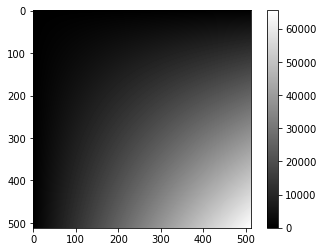

In [10]:
img_sintetica = None

if selectedFunc == 4:
    img_sintetica = np.zeros((sizeC, sizeC))
    x, y = (0, 0)
    img_sintetica[x, y] = 65535.0
    
    for i in range(1 + sizeC ** 2):
        dx, dy = (random.randint(-1, 1), random.randint(-1, 1))
        x, y = (x + dx) % sizeC, (y + dy) % sizeC
        
        img_sintetica[x, y] = 65535.0
else:
    img_sintetica = np.array([[funcs[selectedFunc](x, y) for y in range(sizeC)] for x in range(sizeC)])
    if selectedFunc == 3:
        img_sintetica = img_sintetica.T
    min_value = img_sintetica.min()
    diff = img_sintetica.max() - min_value
    
    # Normalização no intervalo 0-65535
    img_sintetica = (img_sintetica - min_value) * (65535.0 / diff)
    
plt.imshow(img_sintetica, cmap='gray')
plt.colorbar()

Amostragem de Imagem

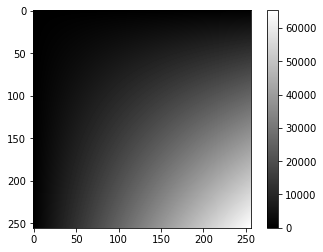

In [11]:
razao_CN = int(sizeC / sizeN)
img_amostrada = np.array([[img_sintetica[x * razao_CN, y * razao_CN] for y in range(sizeN)] for x in range(sizeN)])

plt.imshow(img_amostrada, cmap='gray')
plt.colorbar()

In [16]:
min_value = img_amostrada.min()
diff = img_amostrada.max() - min_value

# Normalização 255
img_quantizada = (img_amostrada - min_value) * 255.0 / diff
img_quantizada = img_quantizada.astype(np.uint8)

img_quantizada = img_quantizada >> (8 - b_per_pixel)
img_quantizada = img_quantizada << (8 - b_per_pixel)

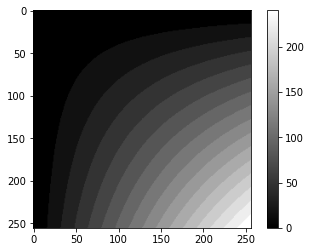

In [17]:
plt.imshow(img_quantizada, cmap='gray')
plt.colorbar()

Comparação com a referência

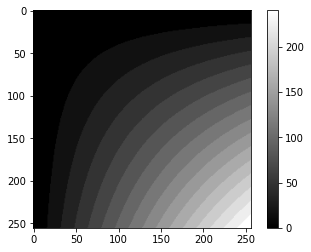

In [15]:
reference_img = np.load(fileName)

plt.imshow(reference_img, cmap='gray')
plt.colorbar()

In [19]:
rse = 0

for i in range(sizeN):
    for j in range(sizeN):
        rse += (int(img_quantizada[i, j]) - int(reference_img[i, j])) ** 2
        
print(round(np.sqrt(rse), 4))

48.0
